<a href="https://colab.research.google.com/github/cibelerusso/Aprendizado_de_Maquina/blob/main/Codigos%20em%20Python/PIPGES/08_Pycaret_para_classifica%C3%A7%C3%A3o_autoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprendizado de Máquina Estatístico

### por Cibele Russo

### ICMC/USP - São Carlos SP

## Uso do PyCaret para regressão: autoML (automated machine learning)


In [1]:
# Instale o PyCaret se ainda não estiver instalado
!pip install pycaret


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 4.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 872.9 kB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.6/283.6 kB 1.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 1.0 MB/s eta 0:00:004.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 2.1 MB/s eta 0:0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 1.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 860.9 kB/s eta 0:00:001m820.1 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 646.3 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 1.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 1.2 MB/s eta 0:00:001.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 3.3 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 2.8 MB/s eta 0:00:004.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 878.7 kB/s eta 0:00:00 kB/s eta 0:00

In [1]:
# Importe o PyCaret e carregue o conjunto de dados Iris
from pycaret.regression import *
from pycaret.datasets import get_data

# Carregue o conjunto de dados Iris
data = get_data('iris')


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Suponha, para exemplo, que a sua variável resposta seja sepal_width e as demais sejam preditoras, em um problema de regressão.

In [2]:
# Configurar o ambiente do PyCaret
setup(data=data, target='sepal_length')


,Description,Value
0,Session id,1991
1,Target,sepal_length
2,Target type,Regression
3,Original data shape,"(150, 5)"
4,Transformed data shape,"(150, 7)"
5,Transformed train set shape,"(105, 7)"
6,Transformed test set shape,"(45, 7)"
7,Numeric features,3
8,Categorical features,1
9,Preprocess,True


In [3]:
# Compare modelos e selecione o melhor
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.2559,0.0999,0.3114,0.8331,0.0450,0.0439,0.0100
knn,K Neighbors Regressor,0.2639,0.1047,0.3192,0.8317,0.0465,0.0453,0.0130
br,Bayesian Ridge,0.2563,0.1002,0.3116,0.8298,0.0452,0.0440,0.0100
lr,Linear Regression,0.2566,0.1005,0.3117,0.8274,0.0453,0.0441,0.1890
ada,AdaBoost Regressor,0.2740,0.1099,0.3251,0.8230,0.0480,0.0478,0.0190
huber,Huber Regressor,0.2573,0.1025,0.3145,0.8219,0.0457,0.0443,0.0130
rf,Random Forest Regressor,0.2822,0.1195,0.3403,0.8076,0.0502,0.0491,0.0380
et,Extra Trees Regressor,0.2777,0.1241,0.3467,0.8048,0.0513,0.0485,0.0330
gbr,Gradient Boosting Regressor,0.2921,0.1298,0.3530,0.7863,0.0515,0.0504,0.0150
dt,Decision Tree Regressor,0.3136,0.1670,0.3924,0.7343,0.0584,0.0550,0.0110


In [6]:
# Crie um modelo específico (por exemplo, Random Forest)
ridge_model = create_model('ridge')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2053,0.0632,0.2514,0.8544,0.0380,0.0381
1,0.3024,0.1338,0.3658,0.7276,0.0498,0.0488
2,0.2444,0.0866,0.2944,0.8935,0.0426,0.0429
3,0.3753,0.1798,0.4241,0.8588,0.0607,0.0627
4,0.2398,0.0912,0.3020,0.8430,0.0433,0.0409
5,0.2203,0.0733,0.2707,0.9061,0.0419,0.0404
6,0.2957,0.1356,0.3683,0.5653,0.0542,0.0499
7,0.2534,0.0915,0.3025,0.8940,0.0418,0.0418
8,0.2519,0.0854,0.2922,0.9130,0.0441,0.0450


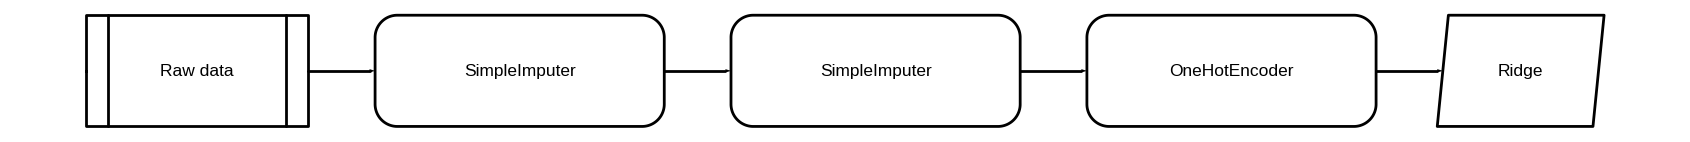

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [7]:
# Avalie o modelo
evaluate_model(ridge_model)


In [8]:
# Faça previsões
predictions = predict_model(ridge_model, data=data)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.2500,0.0956,0.3091,0.8597,0.0448,0.0430


In [9]:
# Exiba as previsões
print(predictions.head())

   sepal_width  petal_length  petal_width      species  sepal_length  \
0          3.5           1.4          0.2  Iris-setosa           5.1   
1          3.0           1.4          0.2  Iris-setosa           4.9   
2          3.2           1.3          0.2  Iris-setosa           4.7   
3          3.1           1.5          0.2  Iris-setosa           4.6   
4          3.6           1.4          0.2  Iris-setosa           5.0   

   prediction_label  
0          5.012958  
1          4.738276  
2          4.779793  
3          4.861568  
4          5.067894  
